In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
np.random.seed(42)

In [71]:
n=60

In [72]:
# Simulacija indikatora

crd_gap=np.random.normal(scale=1.5,loc=2,size=n)
cred_yoy=np.random.uniform(0,12,size=n)
hp_yoy=np.random.uniform(-2,15,size=n)

In [73]:
# Pravimo "skriveno" pravilo za warning koje ZAVISI od SVA TRI

score=(
    0.5*(crd_gap>2).astype(int)+     # veći jaz → više rizika
    0.7*(cred_yoy>6).astype(int)+    # veći rast kreditiranja → više rizika
    0.6*(hp_yoy>5).astype(int)       # veći rast cena nekretnina → više rizika
)


# Ako je kombinovani score dovoljno visok → warning = 1

warning=(score>=1).astype(int)

In [74]:
data=pd.DataFrame({
    'crd_gap':crd_gap,
    'cred_yoy':cred_yoy,
    'hp_yoy':hp_yoy,
    'warning':warning
})

In [75]:
data.head()

,crd_gap,cred_yoy,hp_yoy,warning
0,2.745071,3.970776,6.453225,1
1,1.792604,0.762700,3.114931,0
2,2.971533,3.731788,2.842288,0
3,4.284545,3.902200,-1.372922,0
4,1.648770,8.755274,8.362594,1


In [76]:
data.to_csv("mini_decision_tree_2_entropy_dataset.csv", index=False)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crd_gap   60 non-null     float64
 1   cred_yoy  60 non-null     float64
 2   hp_yoy    60 non-null     float64
 3   warning   60 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


In [78]:
data.describe()

,crd_gap,cred_yoy,hp_yoy,warning
count,60.000000,60.000000,60.000000,60.000000
mean,1.768018,5.922647,6.261028,0.516667
std,1.362782,3.501800,4.893320,0.503939
min,-0.939505,0.083426,-1.718007,0.000000
25%,0.968521,3.013917,2.101755,0.000000
50%,1.655065,5.796063,6.625563,1.000000
75%,2.608928,9.159967,9.894768,1.000000
max,4.778417,11.661385,14.756058,1.000000


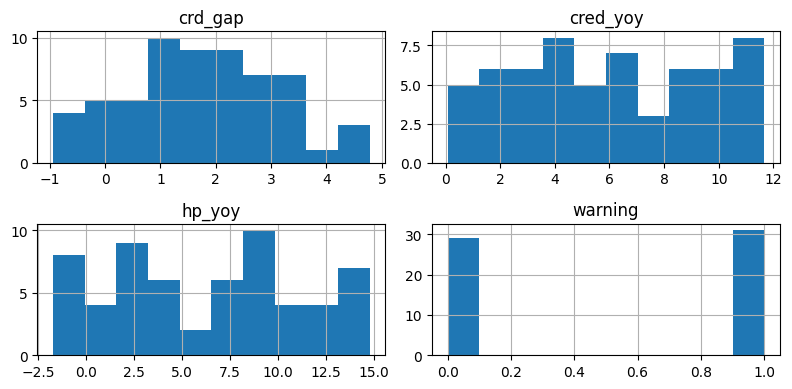

In [79]:
data.hist(figsize=(8,4), bins=10)
plt.tight_layout()
plt.show()

In [80]:
X=data[['crd_gap','cred_yoy','hp_yoy']]
y=data['warning']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [82]:
X_train.shape

(42, 3)

In [83]:
y_train.shape

(42,)

In [84]:
dt_model_entropy = DecisionTreeClassifier(
    criterion="entropy",   # umesto gini
    max_depth=3,
    min_samples_leaf=3,
    random_state=42
)


In [85]:
dt_model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=42)

In [86]:
y_pred=dt_model_entropy.predict(X_test)

In [87]:
print(confusion_matrix(y_test,y_pred))

[[ 7  0]
 [ 0 11]]


In [88]:
print(classification_report(y_test, y_pred, digits=1))

              precision    recall  f1-score   support

           0        1.0       1.0       1.0         7
           1        1.0       1.0       1.0        11

    accuracy                            1.0        18
   macro avg        1.0       1.0       1.0        18
weighted avg        1.0       1.0       1.0        18



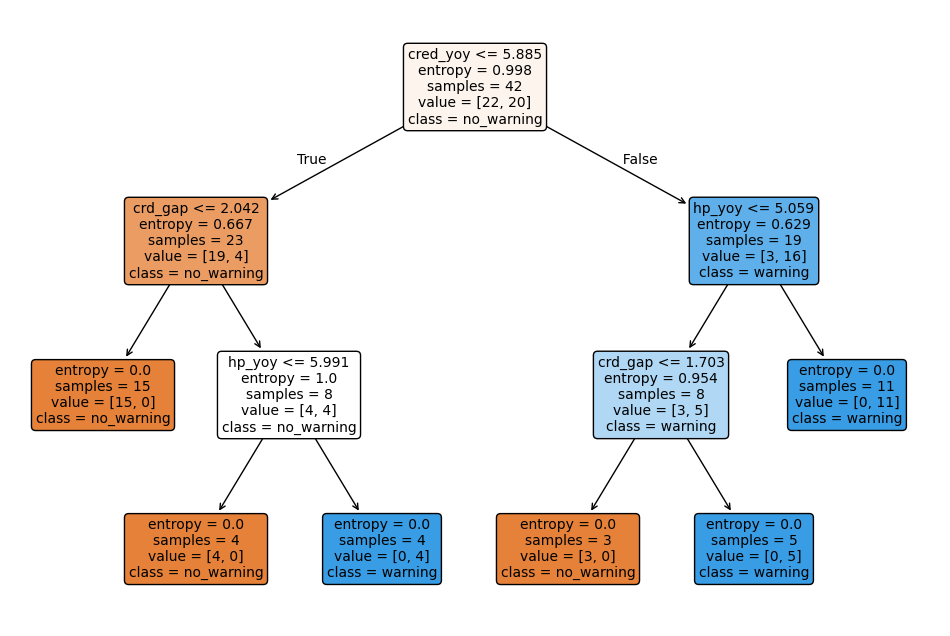

In [89]:
plt.figure(figsize=(12,8))
tree.plot_tree(dt_model_entropy, 
               feature_names=X.columns, 
               class_names=['no_warning','warning'], 
               filled=True, 
               rounded=True,
               fontsize=10)
plt.show()

crd_gap     0.356936
cred_yoy    0.349244
hp_yoy      0.293820
dtype: float64


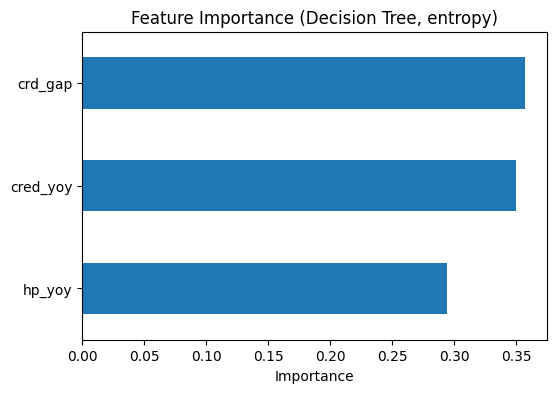

In [90]:
importance = pd.Series(
    dt_model_entropy.feature_importances_,
    index=['crd_gap', 'cred_yoy', 'hp_yoy']
)

print(importance)

plt.figure(figsize=(6,4))
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance (Decision Tree, entropy)")
plt.xlabel("Importance")
plt.show()